In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
ROOT_DIR = '/content'

#### train, test, gender_submission 데이터 head()

In [3]:
gender_df = pd.read_csv(os.path.join(ROOT_DIR, 'gender_submission.csv'))

gender_df.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [4]:
test_df  = pd.read_csv(os.path.join(ROOT_DIR, 'test.csv'))

test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df = pd.read_csv(os.path.join(ROOT_DIR, 'train.csv'))

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### train, test, gender_submission 데이터 통계 (describe)

In [6]:
train_df.describe(exclude=['O'])  # object data type 제외, 즉 수치 데이터만 출력, describe() 동일함

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])  # object data type 출력

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [8]:
test_df.describe()  # test_df.describe(exclude=['O'])

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [10]:
gender_df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


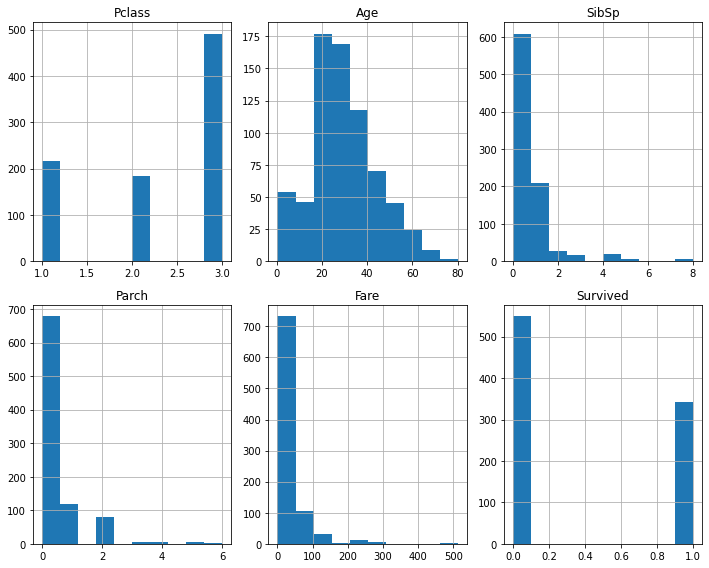

In [11]:
import matplotlib.pyplot as plt

columns = [ 'Pclass', 'Age', 'SibSp', 
           'Parch', 'Fare', 'Survived' ]

plt.figure(figsize=(10,8))

for index in range(6):

    plt.subplot(2, 3, index+1)
    plt.title(str(columns[index]))
    train_df[str(columns[index])].hist()

plt.tight_layout()
plt.show()

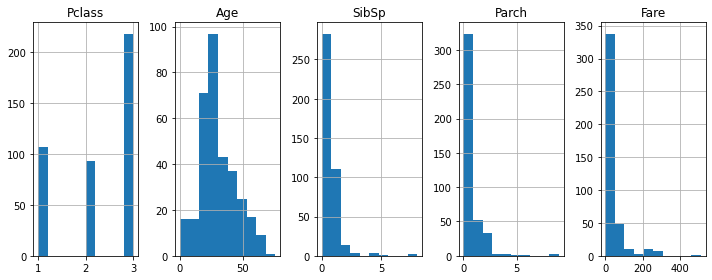

In [12]:
import matplotlib.pyplot as plt

columns = [ 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',  ]

plt.figure(figsize=(10,4))

for index in range(5):

    plt.subplot(1, 5, index+1)
    plt.title(str(columns[index]))
    test_df[str(columns[index])].hist()

plt.tight_layout()
plt.show()

# 데이터 전처리

#### 데이터 전처리 1.
#### train_df, test_df 에서의 승선지 결측치를 가장 빈번한 값으로 채운 후에 숫자로 변환

In [13]:
print('counts of missing value (train) => ', train_df['Embarked'].isnull().sum())
print('---------------------------------------')
print(train_df['Embarked'].value_counts())
print('---------------------------------------\n')
print('counts of missing value (test)  => ',test_df['Embarked'].isnull().sum())
print('---------------------------------------')
print(test_df['Embarked'].value_counts())
print('---------------------------------------')

counts of missing value (train) =>  2
---------------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
---------------------------------------

counts of missing value (test)  =>  0
---------------------------------------
S    270
C    102
Q     46
Name: Embarked, dtype: int64
---------------------------------------


In [14]:
train_df['Embarked'].fillna('S', inplace=True)

embarked_mapping = { 'S': 1, 'C': 2, 'Q': 3}

train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping).astype(int)

test_df['Embarked'] =  test_df['Embarked'].map(embarked_mapping).astype(int)

print('counts of missing value (train) => ', train_df['Embarked'].isnull().sum())
print('---------------------------------------')
print(train_df['Embarked'].value_counts())
print('---------------------------------------\n')
print('counts of missing value (test)  => ',test_df['Embarked'].isnull().sum())
print('---------------------------------------')
print(test_df['Embarked'].value_counts())
print('---------------------------------------')

counts of missing value (train) =>  0
---------------------------------------
1    646
2    168
3     77
Name: Embarked, dtype: int64
---------------------------------------

counts of missing value (test)  =>  0
---------------------------------------
1    270
2    102
3     46
Name: Embarked, dtype: int64
---------------------------------------


#### 데이터 전처리 2
#### Name 열에서 Mr, Miss 등의 칭호만 추출해서 새로운 Title 열에 저장

In [15]:
# extract 에서 쓰인 구문의 의미는
# 알파벳으로 되어있고 .으로 찍힌 패턴 추출, expand = False면 Series 리턴

train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.', expand = False)

test_df['Title']  =  test_df.Name.str.extract('([A-Za-z]+)\.', expand = False)

train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,3,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,1,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,1,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,2,Mrs


#### 데이터 전처리 2
#### Title 빈도표 만들기

In [16]:
pd.crosstab(train_df['Title'], train_df['Sex'])   # 행: Title, 열: Sex

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### 데이터 전처리 2
#### 드물게 나타나는 Title 은 바꾼다. female에서는 Miss와 Mrs가, male에서는 Master와 Mr가 두드러지게 나타나며, Mlle와 Ms 는 Miss의, Ms는 Mrs의 불어식 표현

In [17]:

# train_df 에서 에서 Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona' 칭호를 'Rare'로 교체


train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train_df['Title'] = train_df['Title'].replace(['Mlle'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Ms'], 'Miss')
train_df['Title'] = train_df['Title'].replace(['Mme'], 'Mrs')


test_df["Title"] = test_df["Title"].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

test_df['Title'] = test_df['Title'].replace(['Mlle'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Ms'], 'Miss')
test_df['Title'] = test_df['Title'].replace(['Mme'], 'Mrs')


In [18]:
train_df.groupby('Title', as_index=False)['Survived'].mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Text(0.5, 0, 'Title')

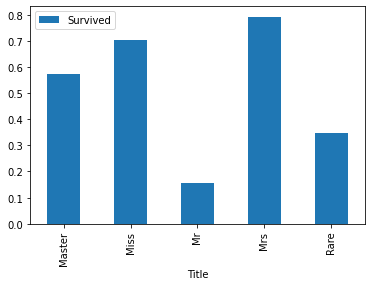

In [19]:
title_survived = train_df.groupby('Title', as_index=False)['Survived'].mean()

title_survived.plot('Title', kind='bar', ).set_xlabel('Title')

Text(0.5, 0, 'Title')

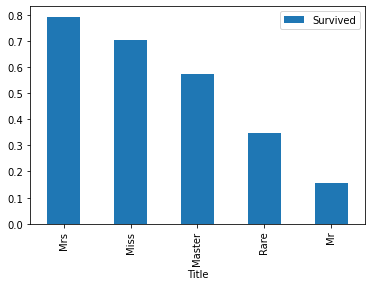

In [20]:
title_survived = train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

title_survived.plot('Title', kind='bar', ).set_xlabel('Title')

In [21]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

train_df['Title'] = train_df['Title'].map(title_mapping).astype(int)

test_df['Title'] = test_df['Title'].map(title_mapping).astype(int)

print('counts of missing value (train) => ', train_df['Title'].isnull().sum())
print('---------------------------------------')
print(train_df['Title'].value_counts())
print('---------------------------------------\n')
print('counts of missing value (test)  => ',test_df['Title'].isnull().sum())
print('---------------------------------------')
print(test_df['Title'].value_counts())
print('---------------------------------------')

counts of missing value (train) =>  0
---------------------------------------
1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64
---------------------------------------

counts of missing value (test)  =>  0
---------------------------------------
1    240
2     79
3     72
4     21
5      6
Name: Title, dtype: int64
---------------------------------------


#### 데이터 전처리 3
#### 성별 (Sex)을 숫자로 변환

In [22]:
sex_mapping = {'male': 1, 'female': 2}

train_df['Sex'] =  train_df['Sex'].map(sex_mapping).astype(int)

test_df['Sex']  =  test_df['Sex'].map(sex_mapping).astype(int)

print('counts of missing value (train) => ', train_df['Sex'].isnull().sum())
print('---------------------------------------')
print(train_df['Sex'].value_counts())
print('---------------------------------------\n')
print('counts of missing value (test)  => ',test_df['Sex'].isnull().sum())
print('---------------------------------------')
print(test_df['Sex'].value_counts())
print('---------------------------------------')

counts of missing value (train) =>  0
---------------------------------------
1    577
2    314
Name: Sex, dtype: int64
---------------------------------------

counts of missing value (test)  =>  0
---------------------------------------
1    266
2    152
Name: Sex, dtype: int64
---------------------------------------


#### 데이터 전처리 4
#### Age 결측값 보완

In [23]:
train_df.groupby('Title')['Age'].median()

Title
1    30.0
2    21.0
3    35.0
4     3.5
5    48.5
Name: Age, dtype: float64

In [24]:
test_df.groupby('Title')['Age'].median()

Title
1    28.5
2    22.0
3    36.5
4     7.0
5    44.0
Name: Age, dtype: float64

In [25]:
train_df['Age'].fillna(train_df.groupby('Title')['Age'].transform('median'), inplace=True)

test_df['Age'].fillna(test_df.groupby('Title')['Age'].transform('median'), inplace=True)

In [26]:
train_df['Age'] =  train_df['Age'].astype(int) # 연령을 정수형으로 변환

test_df['Age'] =  test_df['Age'].astype(int)

#### 데이터 전처리 5
#### train_df, test_df 에 새로운 AgeBand(연령대) 칼럼 추가 후 생존율 확인

In [27]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 8)   

train_df.groupby('AgeBand', as_index=False)['Survived'].mean().sort_values(by = "AgeBand", ascending = True)


train_df["AgeBand"] = pd.cut(train_df["Age"], bins = 8, labels = [0, 1, 2, 3, 4, 5, 6, 7])

train_df.groupby('AgeBand', as_index=False)['Survived'].mean().sort_values(by = "AgeBand", ascending = True)

,AgeBand,Survived
0,0,0.588235
1,1,0.379310
2,2,0.310881
3,3,0.482558
4,4,0.388235
5,5,0.404762
6,6,0.222222
7,7,0.250000


In [28]:
train_df["AgeBand"] = pd.cut(train_df["Age"], bins = 8, labels = [0, 1, 2, 3, 4, 5, 6, 7])

train_df.groupby('AgeBand', as_index=False)['Survived'].mean().sort_values(by = "AgeBand", ascending = True)

,AgeBand,Survived
0,0,0.588235
1,1,0.379310
2,2,0.310881
3,3,0.482558
4,4,0.388235
5,5,0.404762
6,6,0.222222
7,7,0.250000


In [29]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,0,0.588235
1,1,0.379310
2,2,0.310881
3,3,0.482558
4,4,0.388235
5,5,0.404762
6,6,0.222222
7,7,0.250000


In [30]:
train_df.groupby(('AgeBand'), as_index = False)['Survived'].mean().sort_values(by = 'AgeBand', ascending = True)

,AgeBand,Survived
0,0,0.588235
1,1,0.379310
2,2,0.310881
3,3,0.482558
4,4,0.388235
5,5,0.404762
6,6,0.222222
7,7,0.250000


#### test_df 에 연령대를 자료에 추가하고 숫자로 변환. 여기서 train_df 처럼 pd.cut 하지 않는 이유는, 당연히 train 을 8 분류로 나누었기 때문에 test 도 train 분류와 동일하게 8 분류로 하는것임. 즉 test 를 pd.cut 으로 나누면 train 과 데이터 범위가 달라지므로 학습하고 테스트 하는데 의미가 없음

In [31]:
test_df.loc[                        (test_df["Age"] <= 10),  "AgeBand"]  =  0
test_df.loc[(test_df["Age"] > 10) & (test_df["Age"] <= 20),  "AgeBand"]  =  1
test_df.loc[(test_df["Age"] > 20) & (test_df["Age"] <= 30),  "AgeBand"]  =  2
test_df.loc[(test_df["Age"] > 30) & (test_df["Age"] <= 40),  "AgeBand"]  =  3
test_df.loc[(test_df["Age"] > 40) & (test_df["Age"] <= 50),  "AgeBand"]  =  4
test_df.loc[(test_df["Age"] > 50) & (test_df["Age"] <= 60),  "AgeBand"]  =  5
test_df.loc[(test_df["Age"] > 60) & (test_df["Age"] <= 70),  "AgeBand"]  =  6
test_df.loc[(test_df["Age"] > 70)                         ,  "AgeBand"]  =  7

#### 데이터 전처리 6
#### 승선한 가족 규모(Family)를 새로운 칼럼으로 추가 & 승선한 가족 규모에 따른 생존율

In [32]:
train_df['Family'] =  train_df['SibSp'] + train_df['Parch'] + 1         # 1: 자기 자신

test_df['Family'] =  test_df['SibSp']  +  test_df['Parch'] + 1

train_df.groupby('Family', as_index=False)['Survived'].mean().sort_values(by='Family')

,Family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


#### 데이터 전처리 7 
#### 혼자 여부를 나타내는 Alone 칼럼을 새롭게 추가 & 혼자 여부에 따른 생존율

In [33]:
train_df['Alone'] = 0
train_df.loc[train_df['Family'] == 1, 'Alone'] = 1

test_df['Alone'] = 0
test_df.loc[test_df['Family'] == 1, 'Alone'] = 1

train_df.groupby('Alone', as_index=False)['Survived'].mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


#### 데이터 전처리 10
#### train_df 요금대(FareBand)에 따른 생존율

In [34]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], q = 5)    # 동일한 개수로 나눠서 5 개의 요금 범주 생성

train_df.groupby('FareBand', as_index=False)['Survived'].mean().sort_values(by = "FareBand", ascending = True)


train_df['FareBand'] = pd.qcut(train_df['Fare'], q = 5, labels = [0, 1, 2, 3, 4])

train_df.groupby('FareBand', as_index=False)['Survived'].mean().sort_values(by = "FareBand", ascending = True)

,FareBand,Survived
0,0,0.217877
1,1,0.201087
2,2,0.424419
3,3,0.444444
4,4,0.642045


#### train_df 에서 FareBand 숫자로 변환

In [35]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], q = 5, labels = [0, 1, 2, 3, 4])

train_df.groupby('FareBand', as_index=False)['Survived'].mean().sort_values(by = "FareBand", ascending = True)

,FareBand,Survived
0,0,0.217877
1,1,0.201087
2,2,0.424419
3,3,0.444444
4,4,0.642045


##### 데이터 전처리 11
#### test_df 에서 Fare 변수 결측 보완
#### test_df 자료에 요금대 변수 추가 & 숫자로 변환

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)


test_df.loc[                            (test_df["Fare"] <=   7.854),  "FareBand"] = 0
test_df.loc[(test_df["Fare"] > 7.854) &  (test_df["Fare"] <= 10.500),  "FareBand"] = 1
test_df.loc[(test_df["Fare"] > 10.5)  &  (test_df["Fare"] <= 21.679),  "FareBand"] = 2
test_df.loc[(test_df["Fare"] > 21.679) & (test_df["Fare"] <= 39.688),  "FareBand"] = 3
test_df.loc[(test_df["Fare"] > 39.688)                              ,  "FareBand"] = 4

In [37]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family,Alone,FareBand
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,3,1,3.0,1,1,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47,1,0,363272,7.0000,NaN,1,3,4.0,2,0,0.0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,3,1,6.0,1,1,1.0
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,NaN,1,1,2.0,1,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22,1,1,3101298,12.2875,NaN,1,3,2.0,3,0,2.0


In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family,Alone,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,1,1,2,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38,1,0,PC 17599,71.2833,C85,2,3,3,2,0,4
2,3,1,3,"Heikkinen, Miss. Laina",2,26,0,0,STON/O2. 3101282,7.9250,NaN,1,2,2,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35,1,0,113803,53.1000,C123,1,3,3,2,0,4
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,1,1,3,1,1,1


#### 데이터 전처리 13
#### train_df 에서 train_feature_df, train_label_df 분리함

In [39]:
print(train_df.columns.values)

print(test_df.columns.values)

print(gender_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'Title' 'AgeBand' 'Family' 'Alone'
 'FareBand']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'Title' 'AgeBand' 'Family' 'Alone' 'FareBand']
['PassengerId' 'Survived']


In [40]:
# 딥러닝 학습에 필요한 label / feature 정의

label_column = [ 'Survived' ]

feature_columns = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                    'Embarked', 'Title', 'AgeBand', 'Family', 'Alone', 'FareBand' ]


train_feature_df = train_df[feature_columns]

test_feature_df = test_df[feature_columns]

train_label_df = train_df[label_column]

print('train shape = ', train_feature_df.shape, ' , test shape = ', test_feature_df.shape)

train shape =  (891, 12)  , test shape =  (418, 12)


In [41]:
train_feature_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,3,1,22,1,0,7.2500,1,1,2,2,0,0
1,1,2,38,1,0,71.2833,2,3,3,2,0,4


In [42]:
test_feature_df.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,3,1,34,0,0,7.8292,3,1,3.0,1,1,0.0
1,3,2,47,1,0,7.0000,1,3,4.0,2,0,0.0


In [43]:
train_label_df.head(2)

,Survived
0,0
1,1


#### 데이터 전처리 14
#### train_feature_df, test_feature_df 각각의 column 은 서로 다른 unit을 가지기 때문에 표준화사 필요함

In [44]:
from sklearn.preprocessing import StandardScaler

feature_columns = [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                    'Embarked', 'Title', 'AgeBand', 'Family', 'Alone', 'FareBand' ]


scaler = StandardScaler()

#=======================================================================================
# train_feature_df 표준화
#=======================================================================================

train_feature_df_scaled = scaler.fit_transform(train_feature_df[feature_columns])

train_feature_df_scaled = pd.DataFrame(train_feature_df_scaled, columns=feature_columns)

#=======================================================================================
# test_feature_df 표준화
#=======================================================================================

test_feature_df_scaled = scaler.fit_transform(test_feature_df[feature_columns])

test_feature_df_scaled = pd.DataFrame(test_feature_df_scaled, columns=feature_columns)

In [45]:
train_feature_df_scaled.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0.827377,-0.737695,-0.555546,0.432793,-0.473674,-0.502445,-0.568837,-0.707550,-0.261285,0.05916,-1.231645,-1.405533
1,-1.566107,1.355574,0.649913,0.432793,-0.473674,0.786845,1.005181,1.235215,0.494576,0.05916,-1.231645,1.421397


In [46]:
test_feature_df_scaled.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,Family,Alone,FareBand
0,0.873482,-0.755929,0.342583,-0.499470,-0.400248,-0.497413,2.243165,-0.738020,0.477510,-0.553443,0.807573,-1.3952
1,0.873482,1.322876,1.344520,0.616992,-0.400248,-0.512278,-0.677841,1.252253,1.254159,0.105643,-1.238278,-1.3952


# 이제 Panas 를 Numpy 변환한다

In [47]:
x_train = train_feature_df_scaled.to_numpy().astype('float32')

x_test = test_feature_df_scaled.to_numpy().astype('float32')

y_train = train_label_df.to_numpy().astype('float32')

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ',x_test.shape, ' , y_train.shape = ', y_train.shape)

x_train.shape =  (891, 12)  , x_test.shape =  (418, 12)  , y_train.shape =  (891, 1)


In [48]:
#s = np.arange(len(x_train))

#np.random.shuffle(s)

#x_train = x_train[s]

#y_train = y_train[s]

# ANN_Model 구축

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

kaggle_titanic_ann_model = Sequential()

kaggle_titanic_ann_model.add(Dense(64, activation='sigmoid', input_shape=(x_train.shape[1],)))   
kaggle_titanic_ann_model.add(Dropout(0.25))

kaggle_titanic_ann_model.add(Dense(2, activation='softmax'))

In [50]:
kaggle_titanic_ann_model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
kaggle_titanic_ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________


In [51]:
kaggle_titanic_ann_model.compile(optimizer=SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


hist = kaggle_titanic_ann_model.fit(x_train, y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.5926
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5825
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5948
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6184
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6521
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6476
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6622
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6132 - accuracy: 0.6588
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.6745
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5884 - accuracy: 0.7071
Epoch 11/

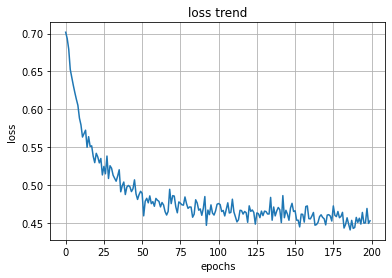

In [52]:
import matplotlib.pyplot as plt

plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.plot(hist.history['loss'])

plt.show()

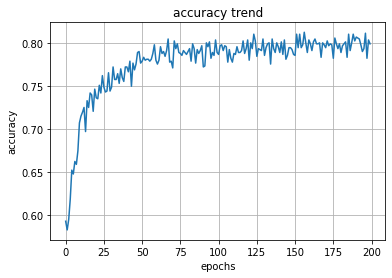

In [53]:
import matplotlib.pyplot as plt

plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'])

plt.show()

In [54]:
survived_prediction = kaggle_titanic_ann_model.predict(x_test)

print(survived_prediction.shape)

14/14 [==============================] - 0s 2ms/step
(418, 2)


In [55]:
survived_prediction_digit = np.argmax(survived_prediction, axis=1)

gender_df['Survived'] = survived_prediction_digit

gender_df.to_csv('Kaggle_Titanic_Competition.csv',index=False)